In [1]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3rAKozTp5vKr2981hco7")
project = rf.workspace("ml-n2gfx").project("modelo-de-deteccion-de-accidente")
version = project.version(4)
dataset = version.download("folder")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Modelo-de-deteccion-de-Accidente-4 in folder:: 100%|██████████| 3951/3951 [00:01<00:00, 3221.65it/s]


In [3]:
data_dir = "/content/Modelo-de-deteccion-de-Accidente-4/test"
categories = ["accidente", "Normal"]  # Carpetas de las clases

In [4]:
IMG_SIZE = 64  # Puedes ajustar este tamaño según tus necesidades

# Cargar imágenes y etiquetas
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_label = categories.index(category)  # Etiquetas numéricas
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Redimensionar
                images.append(img.flatten())  # Aplanar la imagen
                labels.append(class_label)
            except Exception as e:
                print(f"Error cargando imagen {img_path}: {e}")
    return np.array(images), np.array(labels)

In [5]:
X, y = load_data(data_dir, categories)

# Codificar etiquetas si es necesario
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Crear modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf_model.predict(X_test)

In [7]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=categories))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

   accidente       0.83      0.74      0.79        47
      Normal       0.69      0.79      0.74        34

    accuracy                           0.77        81
   macro avg       0.76      0.77      0.76        81
weighted avg       0.77      0.77      0.77        81

Matriz de confusión:
[[35 12]
 [ 7 27]]


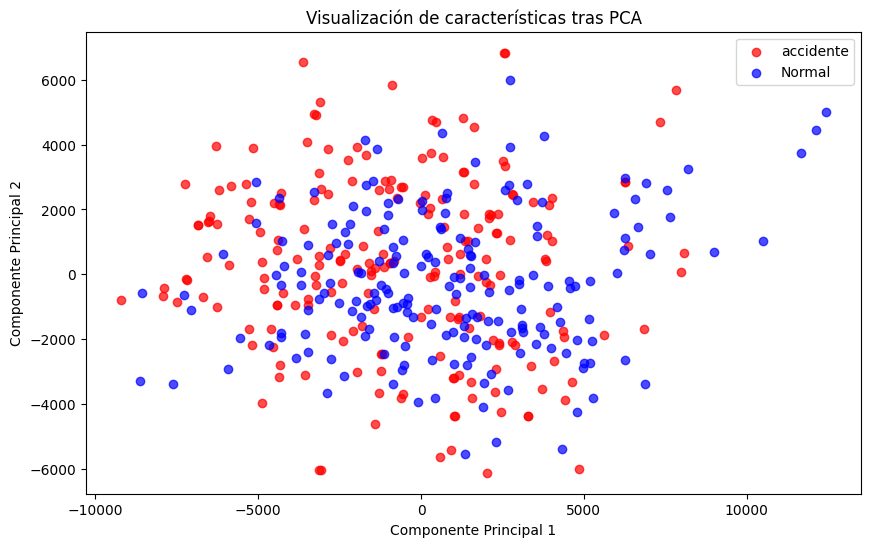

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir las dimensiones con PCA para visualización
pca = PCA(n_components=2)  # Reducir a 2 dimensiones
X_pca = pca.fit_transform(X)  # Aplicar PCA

# Crear un scatter plot con las dos primeras dimensiones
plt.figure(figsize=(10, 6))

# Colores diferentes para cada clase
colors = ['red', 'blue']
labels = ["Accidente", "Normal"]

for i, category in enumerate(categories):
    indices = np.where(y == i)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=category, color=colors[i], alpha=0.7)

plt.title("Visualización de características tras PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()
